In [516]:
import pandas as pd 
import numpy as np

In [517]:
df= pd.read_csv('spam.csv', encoding='latin1')

In [518]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [519]:
df.shape

(5572, 5)

In [520]:
#cleaning
#eda
#text preprocessing 
#model building 
#evluation
#improvement 
#website

***Cleaning***

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [522]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis= 1, inplace= True)

In [523]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [524]:
#renaming columns
df.rename(columns ={'v1': 'target','v2': 'text'}, inplace= True)
df.sample(5)

,target,text
1694,ham,ÌÏ eatin later but i'm eatin wif my frens now ...
5410,ham,"Daddy, shu shu is looking 4 u... U wan me 2 te..."
4136,ham,Just got to &lt;#&gt;
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...
1765,ham,Hi this is yijue... It's regarding the 3230 te...


In [525]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [526]:
df['target']=encoder.fit_transform(df['target'])

In [527]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [528]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [529]:
#check for duplicated
df.duplicated().sum()

np.int64(403)

In [530]:
df = df.drop_duplicates(keep ='first')

In [531]:
df.duplicated().sum()

np.int64(0)

In [532]:
df.shape

(5169, 2)

***EDA***

In [533]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

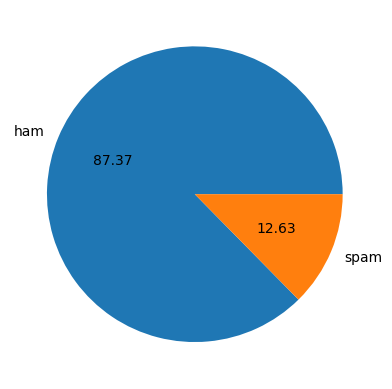

In [534]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [535]:
import nltk 

In [536]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kalyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [537]:
df['num_characters']=df['text'].apply(len)

In [538]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [539]:
df['nums_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [540]:
df.head()

,target,text,num_characters,nums_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [541]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [542]:
df.head()

,target,text,num_characters,nums_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [543]:
df[['num_characters','nums_words','num_sentences']].describe()

,num_characters,nums_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [544]:
df[df['target']==0][['num_characters','nums_words','num_sentences']].describe()

,num_characters,nums_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [545]:
#Spam
df[df['target']==1][['num_characters','nums_words','num_sentences']].describe()

,num_characters,nums_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [546]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

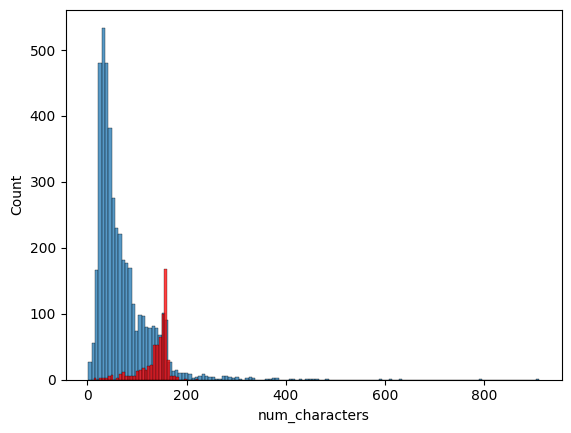

In [547]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color ='red')

<Axes: xlabel='nums_words', ylabel='Count'>

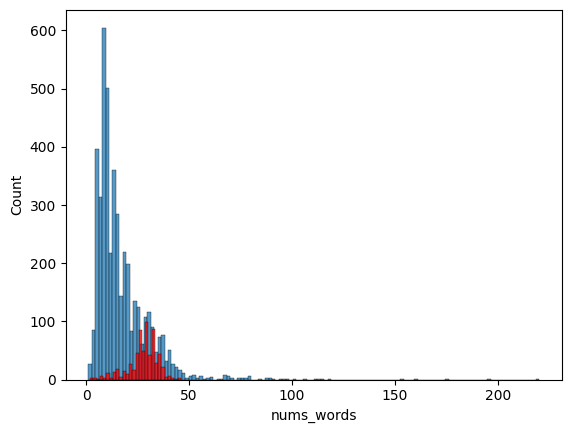

In [548]:
sns.histplot(df[df['target'] == 0]['nums_words'])
sns.histplot(df[df['target'] == 1]['nums_words'],color ='red')

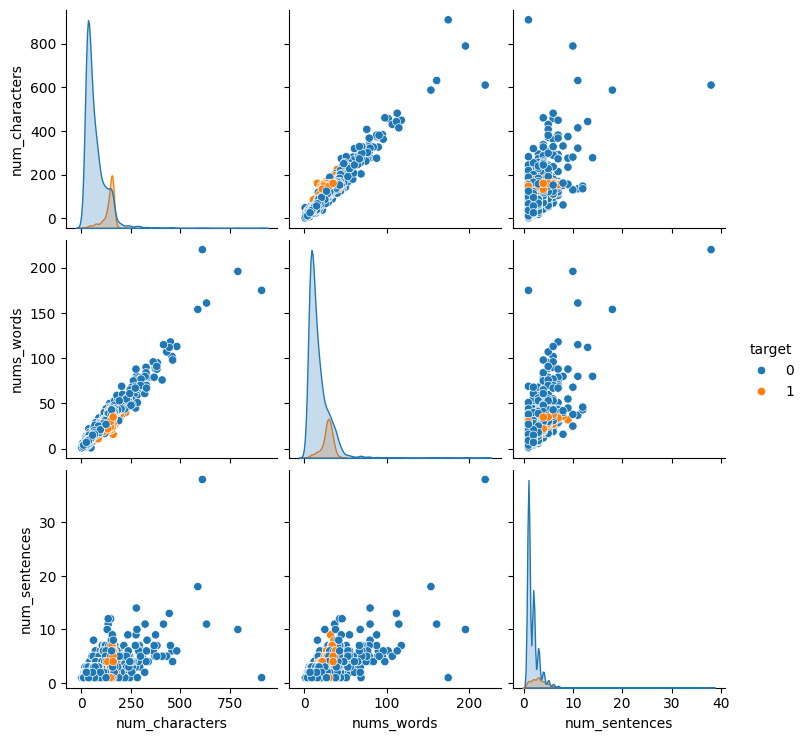

In [549]:
sns.pairplot(df, hue='target')

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   nums_words      5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

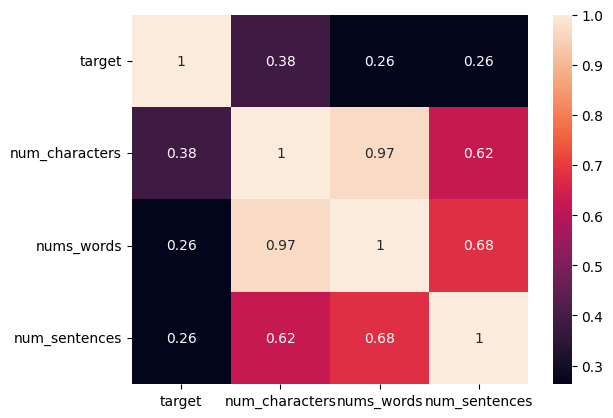

In [551]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

***Preprocessing***

In [552]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [553]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:] 
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [554]:
 transform_text('I loved the YT  lectures on machine learnig. How about you?')

'love yt lectur machin learnig'

In [555]:
df['transformed_text']=df['text'].apply(transform_text)

In [556]:
df.head()

,target,text,num_characters,nums_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [557]:
#Word Cloud to highlite the imp words
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [558]:
df['transformed_text'] = df['transformed_text'].astype(str)

In [559]:
df['transformed_text'] = df['transformed_text'].fillna("")

In [560]:
spam_vc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

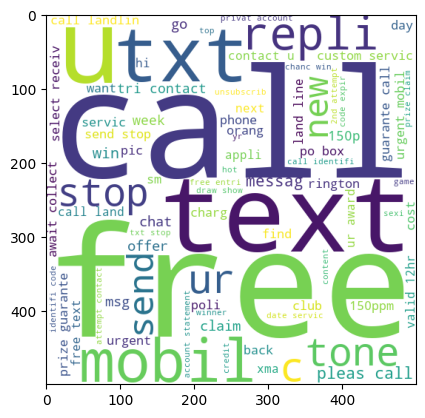

In [561]:
plt.imshow(spam_vc)

In [562]:
ham_vc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

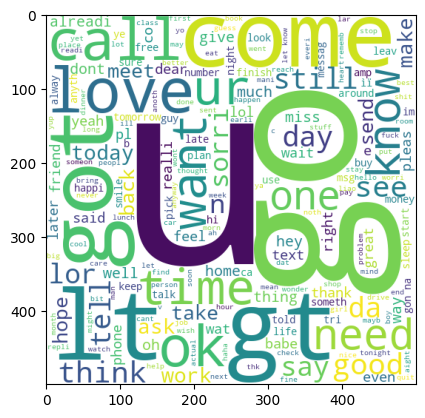

In [563]:
plt.imshow(ham_vc)

In [564]:
#checking the top 3 words
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [565]:
len(spam_corpus)

9939

In [566]:
from collections import Counter 
common_words = Counter(spam_corpus).most_common(30)

In [567]:
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])

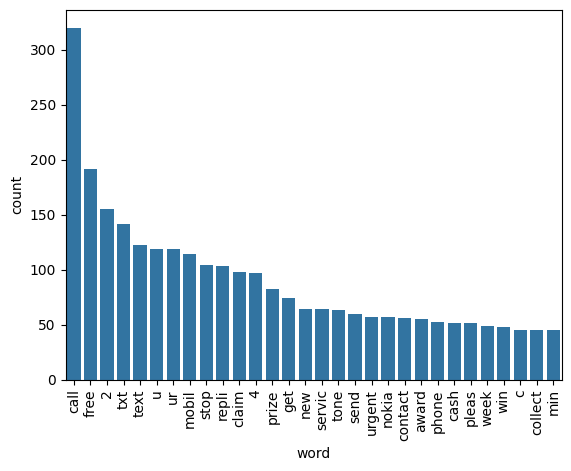

In [568]:
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [569]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [570]:
len(ham_corpus)

35404

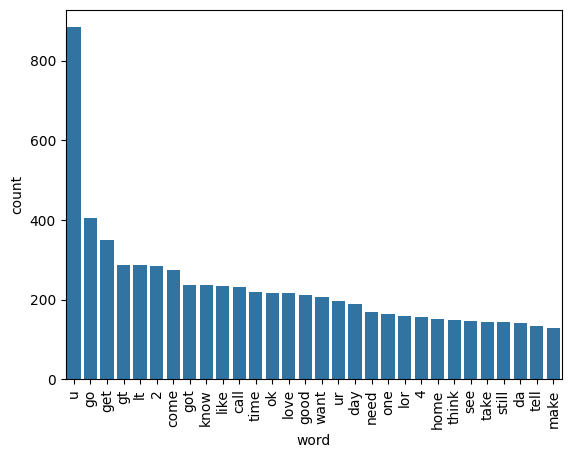

In [571]:
common_words = Counter(ham_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

***Model Build***

In [572]:
df.head()

,target,text,num_characters,nums_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [573]:
#Baging word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [574]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [575]:
X.shape

(5169, 3000)

In [576]:
y= df['target'].values

In [577]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [578]:
from sklearn.model_selection import train_test_split

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=2)

In [580]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [581]:
gnb = GaussianNB()
mnb = MultinomialNB() 
bnb = BernoulliNB() 

In [582]:
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [583]:
mnb.fit(X_train, y_train)
y_predict1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [584]:
bnb.fit(X_train, y_train)
y_predict1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


***Evaluation**

In [585]:
import pickle 

In [586]:
pickle.dump(tfidf, open('vecterizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))